# **Phase kickback**

In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, QuantumRegister, ClassicalRegister, execute, BasicAer
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

In [2]:
import math
%matplotlib inline

In [3]:
# Set up the program
reg1 = QuantumRegister(2, name='reg1')
reg2 = QuantumRegister(1, name='reg2')
qc = QuantumCircuit(reg1, reg2)

In [4]:
qc.h(reg1)         # put a into reg1 superposition of 0,1,2,3
qc.cu1(math.pi/4, reg1[0], reg2)
qc.cu1(math.pi/2, reg1[1], reg2)

/tmp/ipykernel_7841/2307277055.py:2: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  qc.cu1(math.pi/4, reg1[0], reg2)
/tmp/ipykernel_7841/2307277055.py:3: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  qc.cu1(math.pi/2, reg1[1], reg2)


In [5]:
backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()

[0.5+0.j 0.5-0.j 0.5+0.j 0.5-0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j]


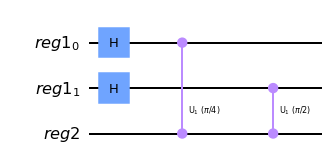

In [6]:
outputstate = result.get_statevector(qc, decimals=3)
print(outputstate)
qc.draw()        # draw the circuit